# Dataframe upload and selection of X

In [203]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [204]:
df=pd.read_csv('../raw_data/final_database.csv')

/tmp/ipykernel_472/1329180163.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('../raw_data/final_database.csv')


In [254]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [255]:
X=df[['Distance_y','Distance_x','Population','PrixMoyen_M2','statut','s1','s2','s3','s4','s5','mountain_city','sea_city','winner']]

In [256]:
X

,Distance_y,Distance_x,Population,PrixMoyen_M2,statut,s1,s2,s3,s4,s5,mountain_city,sea_city,winner
0,18.317875,48.593034,725.0,1938.0,0.0,FZ,MN,OQ,RU,BE,0,0,MACRON Emmanuel
1,26.858520,41.130212,167.0,1130.0,0.0,GI,BE,MN,RU,FZ,0,0,MACRON Emmanuel
2,29.282985,34.282618,11432.0,2005.0,0.0,OQ,FZ,MN,RU,KZ,0,0,MACRON Emmanuel
3,26.518172,32.350317,1407.0,2442.0,0.0,FZ,OQ,MN,RU,BE,0,0,LE PEN Marine
4,32.116108,39.974384,86.0,1155.0,0.0,MN,GI,RU,BE,JZ,0,0,MACRON Emmanuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35503,18.348081,48.955223,428.0,2150.0,0.0,FZ,LZ,OQ,BE,MN,0,0,MACRON Emmanuel
35504,22.467912,23.613028,775.0,3343.0,0.0,MN,FZ,RU,JZ,LZ,0,0,MACRON Emmanuel
35505,12.195536,10.660258,26143.0,2449.0,0.0,FZ,MN,OQ,RU,BE,0,0,MACRON Emmanuel
35506,15.544250,13.889692,168.0,2741.0,0.0,FZ,MN,JZ,RU,BE,0,0,LE PEN Marine


In [208]:
X[X.isna().any(axis=1)]

,Distance_y,Distance_x,Population,PrixMoyen_M2,statut,s1,s2,s3,s4,s5,mountain_city,sea_city,winner
16,40.863956,41.423796,15.0,1927.879177,0.0,FZ,GI,JZ,KZ,LZ,0,0,NaN
29,31.933543,71.708610,10878.0,2015.000000,0.0,FZ,OQ,MN,RU,BE,0,0,NaN
32,36.476504,47.508604,400.0,1587.000000,0.0,FZ,MN,RU,BE,OQ,0,0,NaN
52,30.226509,56.495614,105.0,1927.879177,0.0,NaN,NaN,NaN,NaN,NaN,0,0,NaN
68,37.019010,43.249330,107.0,745.000000,0.0,MN,RU,FZ,GI,JZ,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35389,22.905288,32.739828,15534.0,3002.000000,0.0,MN,FZ,OQ,RU,JZ,0,0,NaN
35391,15.671356,14.030035,8788.0,3169.000000,0.0,MN,OQ,FZ,RU,BE,0,0,NaN
35399,27.673306,43.116287,76.0,2985.120000,0.0,NaN,NaN,NaN,NaN,NaN,0,0,NaN
35412,18.871320,29.217889,23080.0,3684.000000,0.0,MN,FZ,OQ,RU,JZ,0,0,NaN


In [209]:
X.isnull().sum()

Distance_y          0
Distance_x          0
Population          0
PrixMoyen_M2     1606
statut              0
s1                918
s2                918
s3                918
s4                918
s5                918
mountain_city       0
sea_city            0
winner           2396
dtype: int64

In [210]:
X['PrixMoyen_M2'].median()

1390.188940092166

In [211]:
X.PrixMoyen_M2.replace(np.nan, X.PrixMoyen_M2.median(),inplace=True)

/tmp/ipykernel_472/681099089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.PrixMoyen_M2.replace(np.nan, X.PrixMoyen_M2.median(),inplace=True)


In [212]:
X.s1.replace(np.nan,X.s1.mode()[0],inplace=True)
X.s2.replace(np.nan,X.s2.mode()[0],inplace=True)
X.s3.replace(np.nan,X.s3.mode()[0],inplace=True)
X.s4.replace(np.nan,X.s4.mode()[0],inplace=True)
X.s5.replace(np.nan,X.s5.mode()[0],inplace=True)
X.winner.replace(np.nan,X.winner.mode()[0],inplace=True)

/tmp/ipykernel_472/217639540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.s1.replace(np.nan,X.s1.mode()[0],inplace=True)
/tmp/ipykernel_472/217639540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.s2.replace(np.nan,X.s2.mode()[0],inplace=True)
/tmp/ipykernel_472/217639540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.s3.replace(np.nan,X.s3.mode()[0],inplace=True)
/tmp/ipykernel_472/217639540.py:4: SettingWithCop

In [213]:
X.isnull().sum()

Distance_y       0
Distance_x       0
Population       0
PrixMoyen_M2     0
statut           0
s1               0
s2               0
s3               0
s4               0
s5               0
mountain_city    0
sea_city         0
winner           0
dtype: int64

<AxesSubplot:>

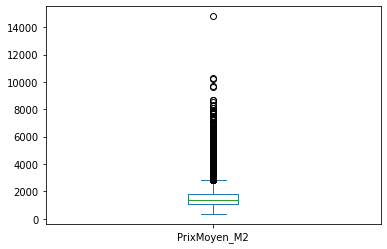

In [214]:
X.iloc[:,3].plot(kind='box')

# Numerical variables scaling and encoding categorical variables

## Numerical Data

In [215]:
X.dtypes

Distance_y       float64
Distance_x       float64
Population       float64
PrixMoyen_M2     float64
statut           float64
s1                object
s2                object
s3                object
s4                object
s5                object
mountain_city      int64
sea_city           int64
winner            object
dtype: object

In [216]:
from sklearn.preprocessing import MinMaxScaler
X_num=X.drop(columns=['statut','s1','s2','s3','s4','s5','mountain_city','sea_city','winner'])
scaler = MinMaxScaler()
scaler.fit(X_num)

MinMaxScaler()

In [217]:
X.iloc[:,0:4]=scaler.transform(X.iloc[:,0:4])

/tmp/ipykernel_472/1442105495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.iloc[:,0:4]=scaler.transform(X.iloc[:,0:4])


In [218]:
X

,Distance_y,Distance_x,Population,PrixMoyen_M2,statut,s1,s2,s3,s4,s5,mountain_city,sea_city,winner
0,0.060688,0.228850,0.024223,0.109873,0.0,FZ,MN,OQ,RU,BE,0,0,MACRON Emmanuel
1,0.089899,0.193399,0.005580,0.053968,0.0,GI,BE,MN,RU,FZ,0,0,MACRON Emmanuel
2,0.098191,0.160871,0.381958,0.114509,0.0,OQ,FZ,MN,RU,KZ,0,0,MACRON Emmanuel
3,0.088735,0.151692,0.047010,0.144745,0.0,FZ,OQ,MN,RU,BE,0,0,LE PEN Marine
4,0.107881,0.187909,0.002873,0.055698,0.0,MN,GI,RU,BE,JZ,0,0,MACRON Emmanuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35503,0.060792,0.230571,0.014300,0.124542,0.0,FZ,LZ,OQ,BE,MN,0,0,MACRON Emmanuel
35504,0.074882,0.110186,0.025894,0.207085,0.0,MN,FZ,RU,JZ,LZ,0,0,MACRON Emmanuel
35505,0.039749,0.048656,0.873471,0.145229,0.0,FZ,MN,OQ,RU,BE,0,0,MACRON Emmanuel
35506,0.051202,0.063997,0.005613,0.165433,0.0,FZ,MN,JZ,RU,BE,0,0,LE PEN Marine


## Categorical Data

In [219]:
X.s2.unique()

array(['MN', 'BE', 'FZ', 'OQ', 'GI', 'RU', 'LZ', 'KZ', 'JZ'], dtype=object)

In [220]:
X.s1.unique()

array(['FZ', 'GI', 'OQ', 'MN', 'BE', 'RU', 'LZ', 'JZ', 'KZ'], dtype=object)

In [221]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)
X_ohe=X[['s1']]
ohe.fit(X_ohe)

OneHotEncoder(sparse=False)

In [222]:
s1_encoded = ohe.transform(X[['s1']])

In [223]:
s1_encoded[169]

array([0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [224]:
X[X['s1']=='JZ']

,Distance_y,Distance_x,Population,PrixMoyen_M2,statut,s1,s2,s3,s4,s5,mountain_city,sea_city,winner
169,0.122444,0.182967,0.003174,0.064900,0.0,JZ,RU,BE,FZ,KZ,0,0,LE PEN Marine
446,0.176992,0.508698,0.005379,0.097696,0.0,JZ,BE,MN,RU,GI,0,0,LE PEN Marine
572,0.143553,0.417533,0.004310,0.043936,0.0,JZ,MN,RU,BE,GI,0,0,LE PEN Marine
579,0.126057,0.471998,0.004343,0.054937,0.0,JZ,RU,BE,FZ,GI,0,0,MACRON Emmanuel
696,0.160636,0.276951,0.002840,0.049886,0.0,JZ,BE,FZ,KZ,LZ,0,0,LE PEN Marine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34681,0.236856,0.734001,0.002372,0.036463,0.0,JZ,LZ,BE,FZ,KZ,0,0,LE PEN Marine
34723,0.159896,0.704277,0.004243,0.054900,0.0,JZ,MN,BE,FZ,KZ,0,0,LE PEN Marine
35063,0.046731,0.184220,0.006749,0.048087,1.0,JZ,LZ,GI,BE,KZ,0,0,LE PEN Marine
35153,0.101397,0.133201,0.024925,0.144745,0.0,JZ,FZ,OQ,MN,RU,0,0,LE PEN Marine


In [225]:
X["s1_BE"],X["s1_FZ"],X["s1_GI"],X["s1_JZ"],X["s1_KZ"],X["s1_LZ"],X["s1_MN"],X["s1_OQ"],X["s1_RU"] = s1_encoded.T

/tmp/ipykernel_472/1091497884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["s1_BE"],X["s1_FZ"],X["s1_GI"],X["s1_JZ"],X["s1_KZ"],X["s1_LZ"],X["s1_MN"],X["s1_OQ"],X["s1_RU"] = s1_encoded.T
/tmp/ipykernel_472/1091497884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["s1_BE"],X["s1_FZ"],X["s1_GI"],X["s1_JZ"],X["s1_KZ"],X["s1_LZ"],X["s1_MN"],X["s1_OQ"],X["s1_RU"] = s1_encoded.T
/tmp/ipykernel_472/1091497884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [226]:
#X["s2_MN"],X["s2_BE"],X["s2_FZ"],X["s2_OQ"],X["s2_GI"],X["s2_RU"],X["s2_LZ"],X["s2_KZ"],X["s2_JZ"]

In [227]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
X_oe=X[['winner']]
X[['winner']]=oe.fit_transform(X[['winner']])

/tmp/ipykernel_472/2934047288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['winner']]=oe.fit_transform(X[['winner']])


In [228]:
X=X.drop(columns=['s1','s2','s3','s4','s5'])

In [229]:
X.head(50)

,Distance_y,Distance_x,Population,PrixMoyen_M2,statut,mountain_city,sea_city,winner,s1_BE,s1_FZ,s1_GI,s1_JZ,s1_KZ,s1_LZ,s1_MN,s1_OQ,s1_RU
0,0.060688,0.228850,0.024223,0.109873,0.0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.089899,0.193399,0.005580,0.053968,0.0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.098191,0.160871,0.381958,0.114509,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.088735,0.151692,0.047010,0.144745,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.107881,0.187909,0.002873,0.055698,0.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.081098,0.175947,0.071634,0.111603,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.103004,0.141582,0.019579,0.110012,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.105673,0.213146,0.009188,0.042621,0.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.084533,0.277863,0.025794,0.112087,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.114592,0.326894,0.010959,0.037293,0.0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# KMeans Clustering

In [230]:
km = KMeans(n_clusters=15)
km.fit(X).inertia_

16347.852541006276

In [233]:
wcss = []
clusters = list(range(1, 100))
for K in clusters:
    wcss.append(KMeans(n_clusters=K, random_state=42).fit(X).inertia_)
wcss

[54930.16030998575,
 45588.65302761592,
 38762.439257650905,
 33807.804811708644,
 30146.135421416384,
 27537.923923331797,
 25485.595175836665,
 23245.568998627503,
 22333.970520112518,
 21035.05407742088,
 19748.528467600023,
 18681.531010771785,
 17776.756879632834,
 16876.644933173913,
 15795.747944505734,
 15233.997792013823,
 14703.547886849565,
 13680.245535667593,
 13450.823185801955,
 12783.95889008084,
 12325.328450290046,
 11765.667876947193,
 11427.990582081386,
 11017.467352650274,
 10601.776144241918,
 10097.900398421938,
 9719.864382055122,
 9476.768589383208,
 9150.461675373857,
 8813.600512676607,
 8614.90490166868,
 8301.746754557491,
 8107.920537580412,
 7686.133026098838,
 7573.765664141045,
 7329.953196333263,
 7026.935658123997,
 6858.923882514579,
 6725.791452314639,
 6501.472593792145,
 6404.340480877323,
 6047.9197694365785,
 5866.97460039642,
 5693.764863645504,
 5612.4761624388475,
 5415.860750975231,
 5331.766559105209,
 5091.665651641136,
 5049.260773105524

<AxesSubplot:>

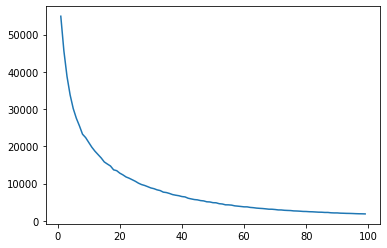

In [234]:
import seaborn as sns
sns.lineplot(x=clusters,y=wcss)

In [243]:
km2 = KMeans(n_clusters=20)
km2.fit(X)
y_pred2=km2.predict(X)
y_pred2

array([13,  1,  4, ..., 13,  4,  1], dtype=int32)

In [ ]:
np.unique(y_pred2,return_counts=True)

In [ ]:
y_pred2.shape

In [244]:
X['cluster']=y_pred2

In [252]:
X[X['cluster']==18].tail(50)

,Distance_y,Distance_x,Population,PrixMoyen_M2,statut,mountain_city,sea_city,winner,s1_BE,s1_FZ,s1_GI,s1_JZ,s1_KZ,s1_LZ,s1_MN,s1_OQ,s1_RU,cluster
33389,0.224443,0.570465,0.026428,0.139002,0.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
33392,0.127241,0.303918,0.012362,0.052653,0.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
33400,0.077494,0.437969,0.031240,0.072442,0.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
33401,0.208360,0.213560,0.008954,0.065592,0.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
33407,0.190003,0.274846,0.050084,0.044697,0.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
33410,0.109838,0.353727,0.035383,0.057704,0.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
33412,0.200451,0.294206,0.024724,0.043313,0.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
33430,0.168935,0.639624,0.051186,0.157753,0.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
33436,0.185439,0.598148,0.050184,0.096658,0.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
33445,0.108550,0.329155,0.010658,0.033488,0.0,0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18


In [257]:
df['cluster']=y_pred2
df

,code_commune_INSEE,code_postal,latitude,longitude,nom_commune_complet,code_departement,nom_departement,code_region,nom_region,coordinates,...,s2,s3,s4,s5,lifelevelscore,mountain_city,sea_city,winner,winner_percentage,cluster
0,01001,1400,46.153426,4.926114,L'Abergement-Clémenciat,1,Ain,84.0,Auvergne-Rhône-Alpes,"(46.1534255214, 4.92611354223)",...,MN,OQ,RU,BE,0.212589,0,0,MACRON Emmanuel,52.67,13
1,01002,1640,46.009188,5.428017,L'Abergement-de-Varey,1,Ain,84.0,Auvergne-Rhône-Alpes,"(46.0091878776, 5.42801696363)",...,BE,MN,RU,FZ,0.208568,0,0,MACRON Emmanuel,66.20,1
2,01004,1500,45.960848,5.372926,Ambérieu-en-Bugey,1,Ain,84.0,Auvergne-Rhône-Alpes,"(45.9608475114, 5.3729257777)",...,FZ,MN,RU,KZ,0.335026,0,0,MACRON Emmanuel,54.14,4
3,01005,1330,45.996180,4.912273,Ambérieux-en-Dombes,1,Ain,84.0,Auvergne-Rhône-Alpes,"(45.9961799872, 4.91227250796)",...,OQ,MN,RU,BE,0.213201,0,0,LE PEN Marine,52.73,4
4,01006,1300,45.749499,5.594320,Ambléon,1,Ain,84.0,Auvergne-Rhône-Alpes,"(45.7494989044, 5.59432017366)",...,GI,RU,BE,JZ,0.208405,0,0,MACRON Emmanuel,62.50,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35503,95676,95510,49.085900,1.730396,Villers-en-Arthies,95,Val-d'Oise,11.0,Île-de-France,"(49.0858999284, 1.73039629888)",...,LZ,OQ,BE,MN,0.211881,0,0,MACRON Emmanuel,51.74,13
35504,95678,95840,49.070289,2.239509,Villiers-Adam,95,Val-d'Oise,11.0,Île-de-France,"(49.0702888248, 2.23950871871)",...,FZ,RU,JZ,LZ,0.221072,0,0,MACRON Emmanuel,55.86,10
35505,95680,95400,49.008449,2.403856,Villiers-le-Bel,95,Val-d'Oise,11.0,Île-de-France,"(49.0084494157, 2.40385604039)",...,MN,OQ,RU,BE,0.246729,0,0,MACRON Emmanuel,67.76,13
35506,95682,95720,49.074309,2.386890,Villiers-le-Sec,95,Val-d'Oise,11.0,Île-de-France,"(49.0743088682, 2.38688959984)",...,MN,JZ,RU,BE,0.209936,0,0,LE PEN Marine,58.06,4


In [259]:
df_cluster=df[['code_commune_INSEE','cluster']]
df_cluster

,code_commune_INSEE,cluster
0,01001,13
1,01002,1
2,01004,4
3,01005,4
4,01006,10
...,...,...
35503,95676,13
35504,95678,10
35505,95680,13
35506,95682,4


In [260]:
df_cluster.to_csv('../raw_data/clusters.csv')

# GMM Clustering

In [238]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=1)
gm.fit(X)

GaussianMixture()